# Data analysis

### Introduction

This is part of Udacity's data science nanodegree program, and more infomration can be found [here](https://www.udacity.com/nanodegree)

The data used in this post is the *Crop Recommendation* dataset, which is provided by [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/4GBWFV), and is also featured on Kaggle




In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

df = pd.read_csv('./Crop_recommendation.csv')
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Exploratory analysis on each column 

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


C:\Users\CLIU210\AppData\Local\Temp\ipykernel_20384\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

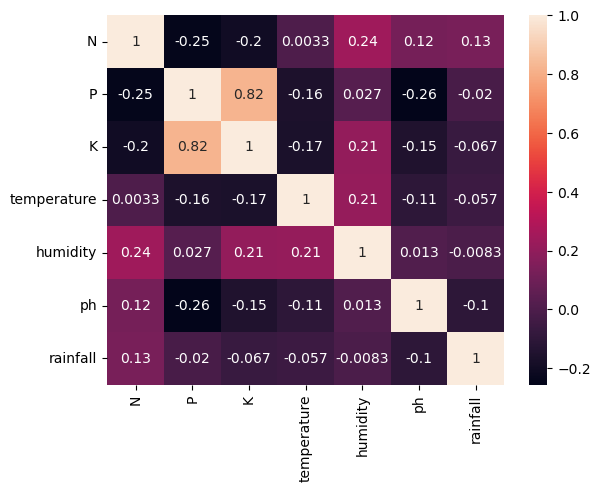

In [10]:
sns.heatmap(df.corr(),annot=True)

Surprisingly, rainfall and humidity does not have strong correlation, however, the phosphrous and potassium exhibit a strong correlation relationship with a coefficient of 0.82

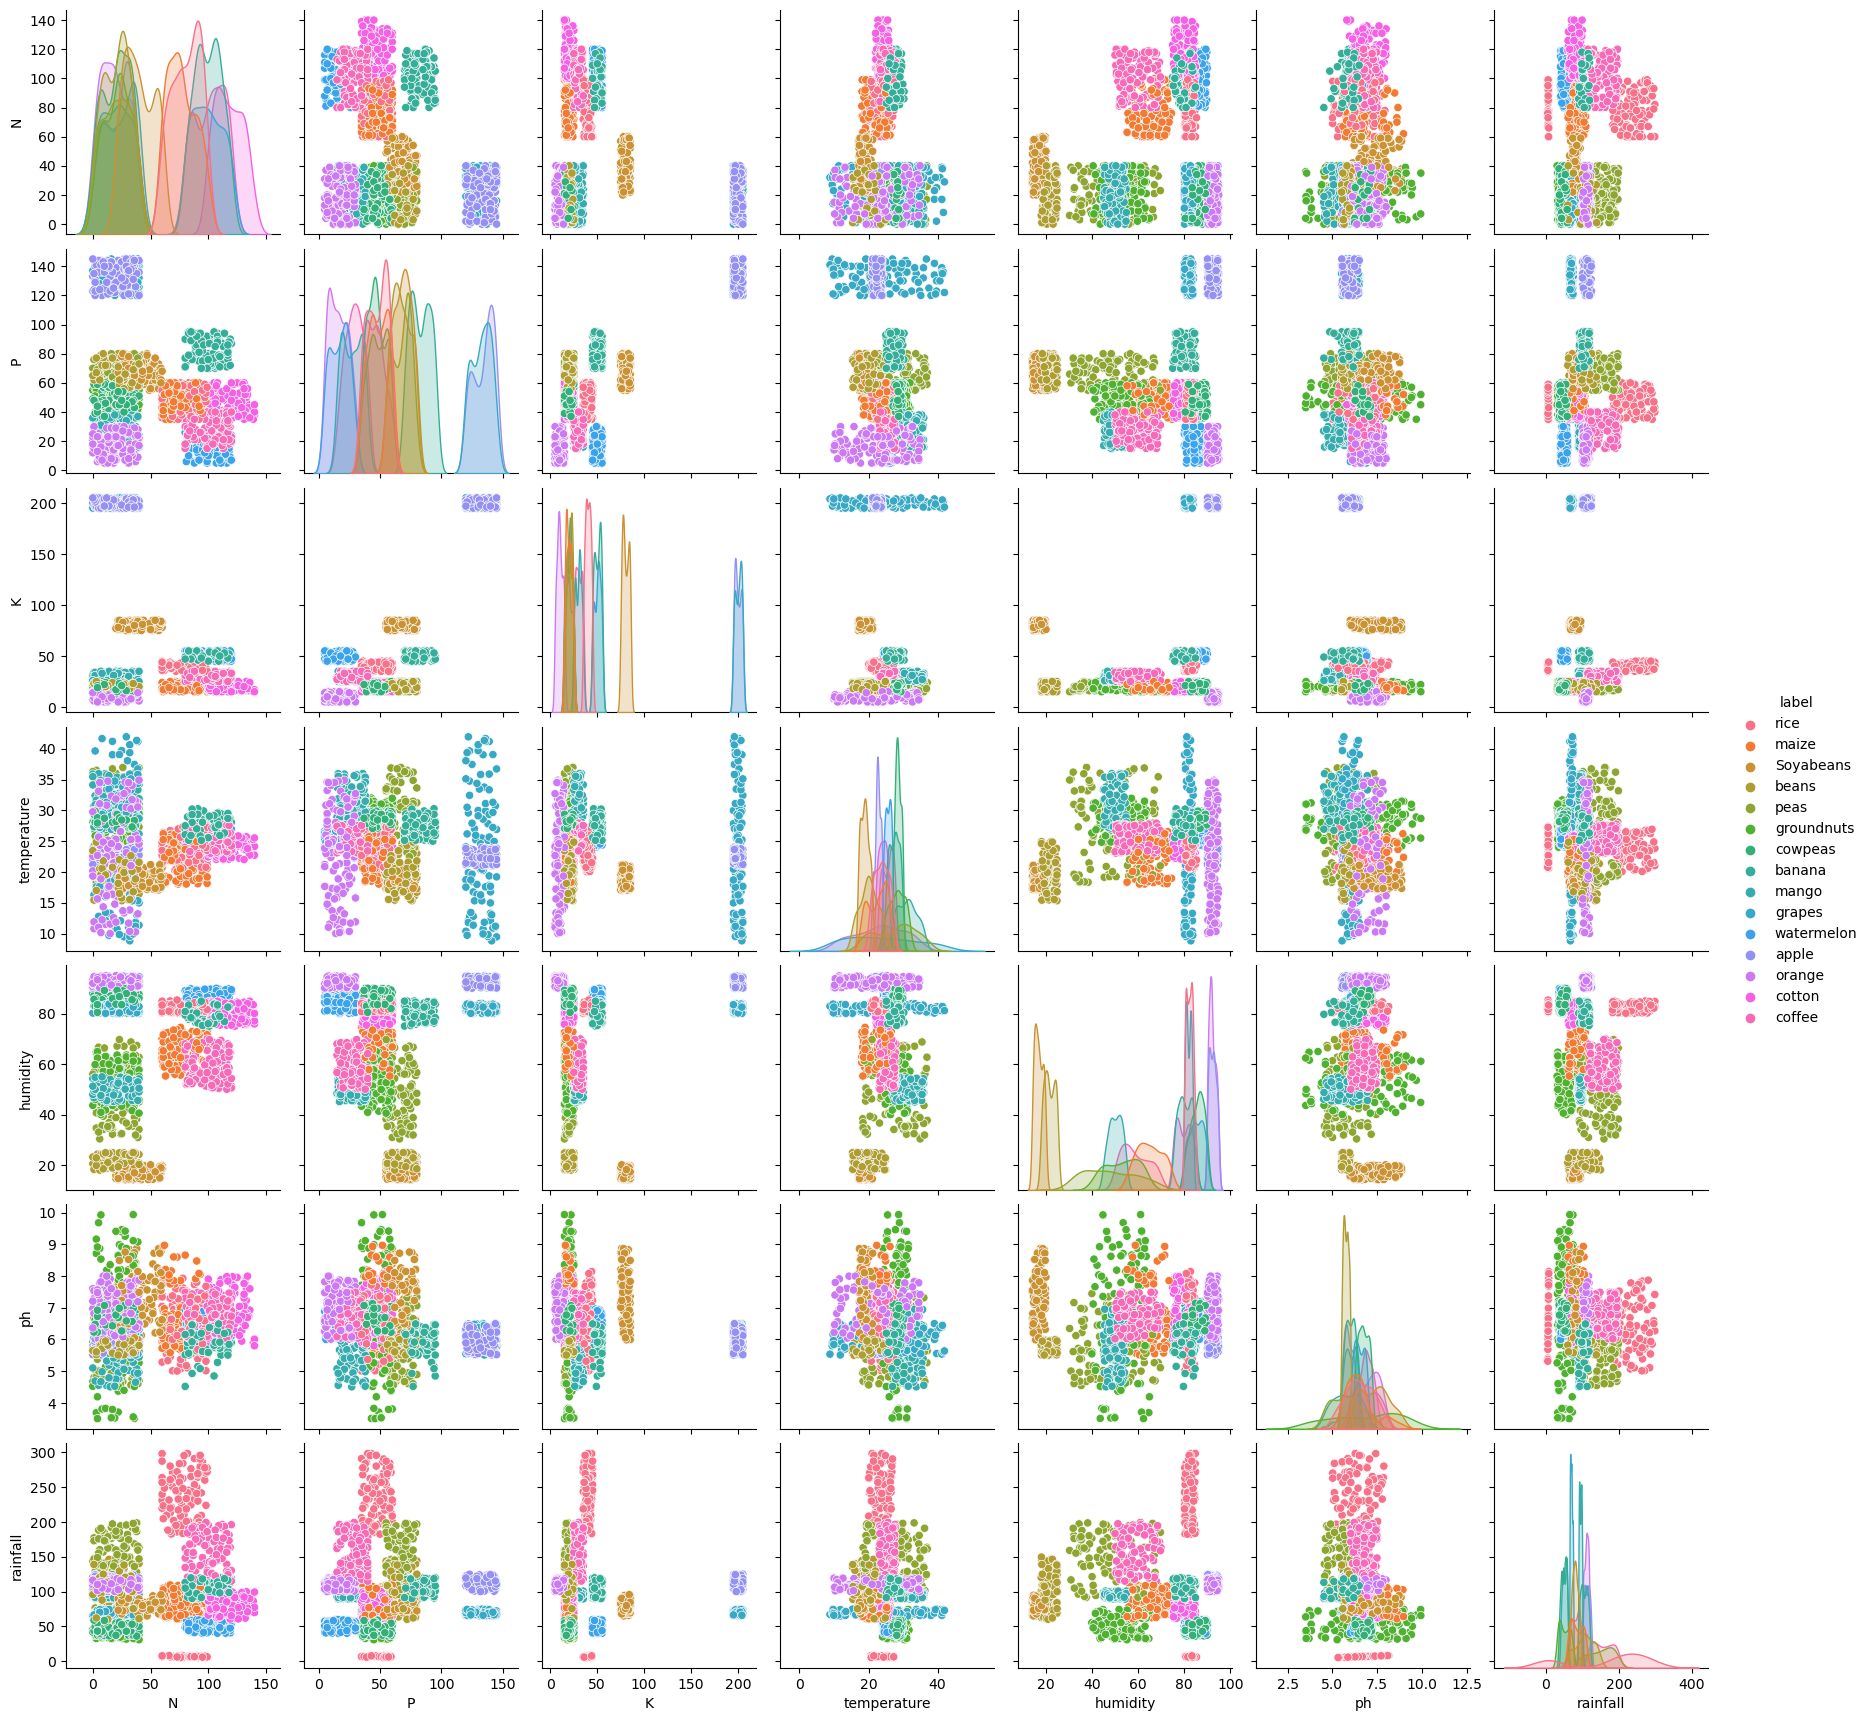

In [11]:
sns.pairplot(df, hue='label')

From the pairplot, it's very apparent that data is very clustered, and each recommended crop falls in a very specified range in terms of feature. Let's further explore this by plotting the stripplot of every feature

<AxesSubplot:xlabel='N', ylabel='label'>

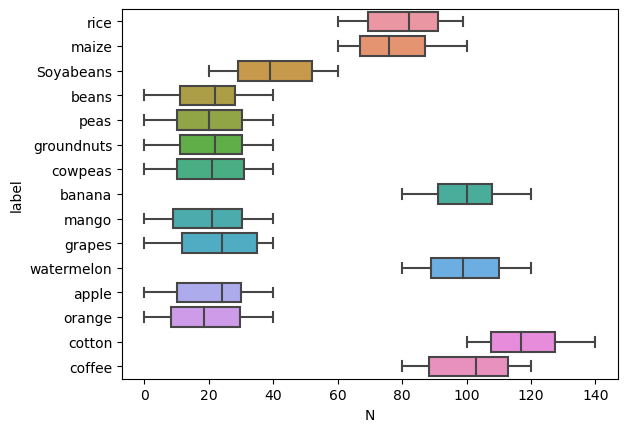

In [12]:
df.select_dtypes(include = [int, float]).columns
sns.boxplot(data=df, x='N', y='label')

<AxesSubplot:xlabel='N', ylabel='label'>

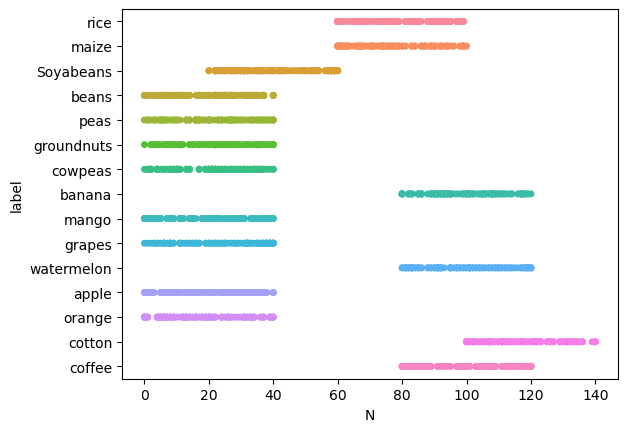

In [13]:
sns.stripplot(data=df, x='N', y='label', jitter=False)

Looks like the stripplot is a prettier visualization method for this purpose, and here's the rest of the columns

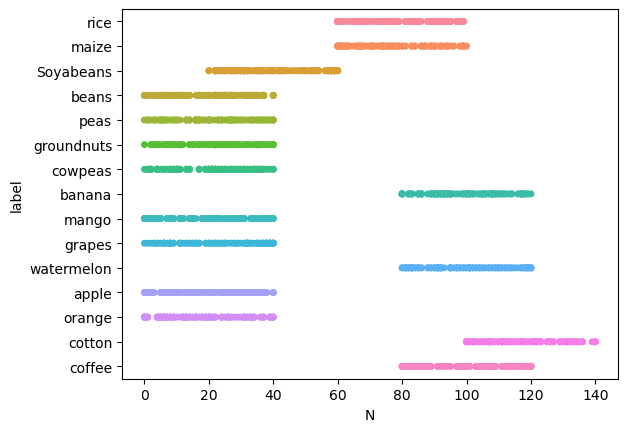

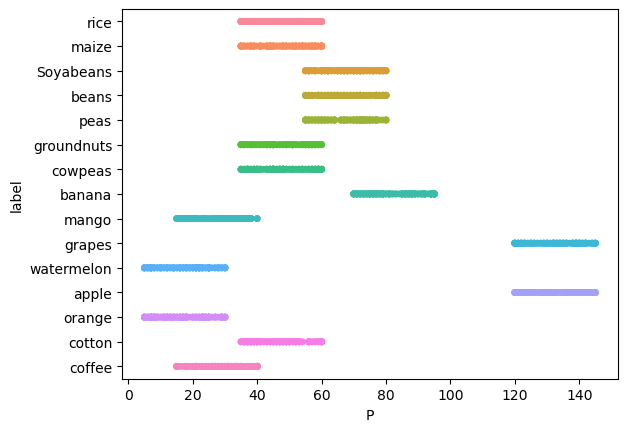

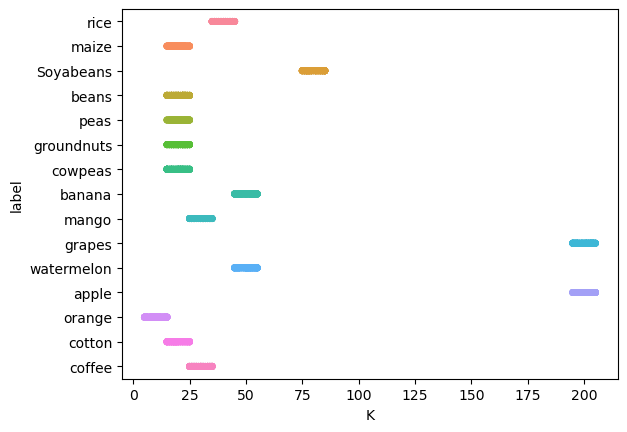

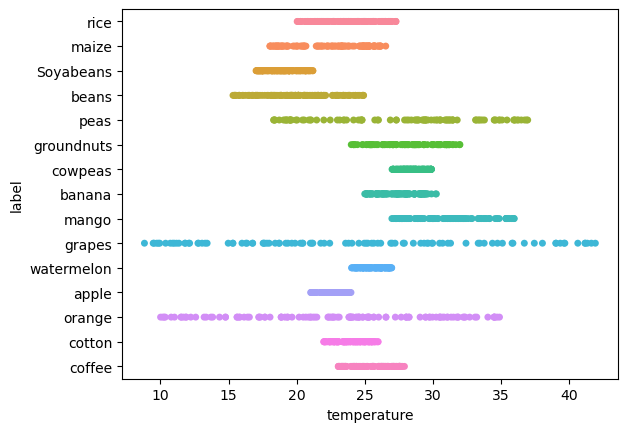

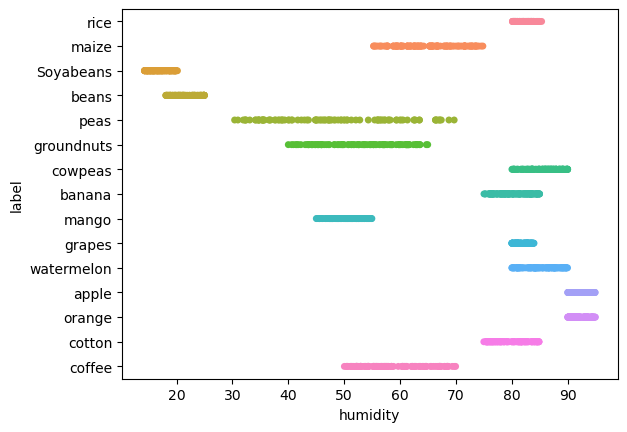

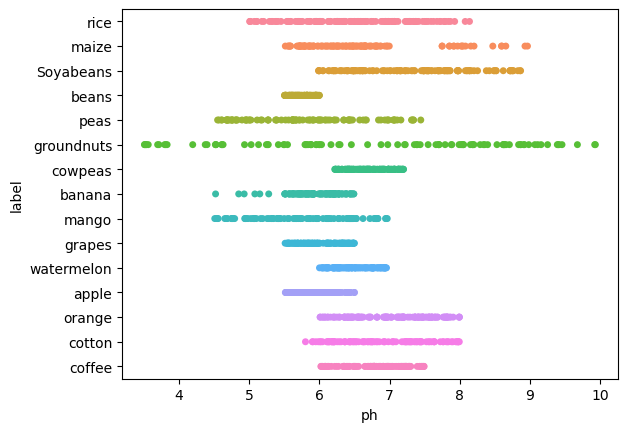

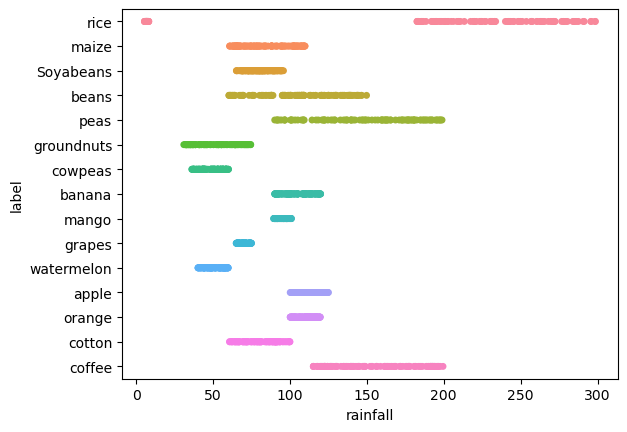

In [14]:
cols = list(df.select_dtypes(include=[int, float]).columns)

for col in cols:
    plt.figure()
    sns.stripplot(data=df, x=col, y='label', jitter=False)



As show in above, most crops falls in a relative short range of values, with only a few exceptions, like grape/temperature, rice/rainfall, groundnuts/ph. 

Lets try a few algorithms for the classification task. The intention of the 

In [36]:
# Exploring different classification alogrithms 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

def decision_tree(X_train, X_test, y_train, y_test, random_state=42):
    clf = DecisionTreeClassifier(random_state=random_state)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred, average='micro')
    return score

def knn(X_train, X_test, y_train, y_test, n_neighbors=10):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred, average='micro')
    y_test_arr = np.array(y_test)
    return score

def svmc(X_train, X_test, y_train, y_test, random_state=42, kernel='linear'):
    clf = SVC(random_state=random_state, kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred, average='micro')
    return score

def logistic(X_train, X_test, y_train, y_test, random_state=42, solver='lbfgs'):
    clf = LogisticRegression(random_state=random_state, solver=solver)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred, average='micro')
    return score


def nn(X_train, X_test, y_train, y_test, random_state=42):
    clf = MLPClassifier(activation = 'relu', random_state=42, max_iter=2000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred, average='micro')
    return score



Summarizing all the classification methods together, and seeing their scores 


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Train test split
X = df.drop(labels='label', axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [44]:
functions = [decision_tree, knn, svmc, logistic, nn]
function_names = ['decision_tree', 'knn', 'svmc', 'logistic', 'nn']

result = []
for func in functions:
    result.append(func(X_train, X_test, y_train, y_test))



<AxesSubplot:>

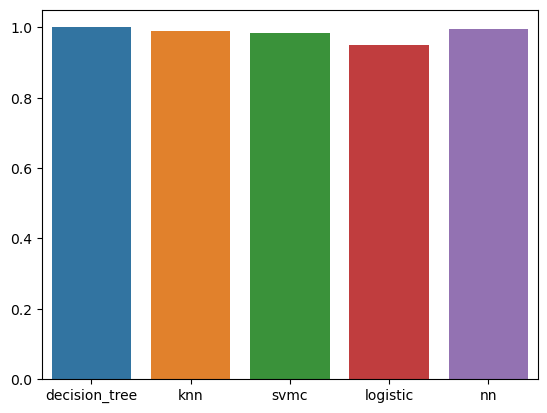

In [43]:
import 